# Proyek Analisis Data: Bike Sharing Dataset
- **Nama**: Adib Haidar Zaky
- **Email**: adibhaidarzaky@gmail.com
- **ID Dicoding**: adibhaidarzaky@gmail.com

## Menentukan pertanyaan bisnis
1. Bagaimana tren penggunaan sepeda tiap musimnya satu tahun terakhir?
2. Apakah jam sibuk terjadi pada pagi dan sore hari saat jam kerja atau di akhir pekan saat jam siang?

## Import Semua Packages/Library yang Digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [121]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [82]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**:
- Membaca file `day.csv` dan file `hour.csv`
- Display 5 data pertama dari dataframe day dan hour

### Assessing Data

#### Menilai data day_df

In [83]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [84]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [85]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


In [86]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data `hour_df`

In [87]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [88]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [89]:
print("Jumlah data duplikat: ", hour_df.duplicated().sum())

Jumlah data duplikat:  0


In [90]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**:
- Cek semua tipe data tiap kolom: ditemukan tipe data yang kurang tepat pada kolom `dteday` yang seharusnya datetime
- Cek missing value
- Cek duplikat data

### Cleaning Data

#### Membersihkan data `day_df`

##### Membenarkan tipe data

In [91]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [92]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan data `hour_df`

##### Membenarkan tipe data

In [93]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [94]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight**:
- Cek tipe data tiap kolom
- Mengganti tipe data `dteday` menjadi datetime 

## Exploratory Data Analysis (EDA)

### Explore data `day_df`

In [122]:
day_df["season"] = day_df["season"].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
day_df["yr"] = day_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)
day_df["mnth"] = day_df["mnth"].apply(lambda x: 
    "January" if x == 1 else
    ("February" if x == 2 else
    ("March" if x == 3 else
    ("April" if x == 4 else
    ("May" if x == 5 else
    ("June" if x == 6 else
    ("July" if x == 7 else
    ("August" if x == 8 else
    ("September" if x == 9 else
    ("October" if x == 10 else
    ("November" if x == 11 else "December")))))))))))
day_df["holiday"] = day_df["holiday"].apply(lambda x: "Holiday" if x == 1 else "Not Holiday")
day_df["workingday"] = day_df["workingday"].apply(lambda x: "Working Day" if x == 1 else "Not Working Day")
day_df["weekday"] = day_df["weekday"].apply(lambda x: 
    "Sunday" if x == 0 else
    ("Monday" if x == 1 else
    ("Tuesday" if x == 2 else
    ("Wednesday" if x == 3 else
    ("Thursday" if x == 4 else
    ("Friday" if x == 5 else "Saturday"))))))
day_df.head()                                      

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Not Holiday,Sunday,Not Working Day,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Not Holiday,Monday,Working Day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Not Holiday,Tuesday,Working Day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Not Holiday,Wednesday,Working Day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [123]:
day_df.sort_values(by="registered", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,635,2012-09-26,Winter,2012,September,Not Holiday,Wednesday,Working Day,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
629,630,2012-09-21,Fall,2012,September,Not Holiday,Friday,Working Day,1,0.599167,0.571971,0.668750,0.154229,1250,6917,8167
648,649,2012-10-10,Winter,2012,October,Not Holiday,Wednesday,Working Day,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691
662,663,2012-10-24,Winter,2012,October,Not Holiday,Wednesday,Working Day,1,0.587500,0.558721,0.636250,0.072779,795,6898,7693
641,642,2012-10-03,Winter,2012,October,Not Holiday,Wednesday,Working Day,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,2011-01-26,Spring,2011,January,Not Holiday,Wednesday,Working Day,3,0.217500,0.203600,0.862500,0.293850,34,472,506
358,359,2011-12-25,Spring,2011,December,Not Holiday,Sunday,Not Working Day,1,0.274783,0.279961,0.681304,0.155091,303,451,754
725,726,2012-12-26,Spring,2012,December,Not Holiday,Wednesday,Working Day,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,Spring,2011,January,Not Holiday,Thursday,Working Day,1,0.195000,0.219700,0.687500,0.113837,15,416,431


In [124]:
day_df.groupby(by=["season", "yr"]).agg({
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum"
    })

casual  registered     cnt
season yr                              
Fall   2011   95450      324200  419650
       2012  130641      510838  641479
Spring 2011   21425      128575  150000
       2012   39197      282151  321348
Summer 2011   77564      269752  347316
       2012  125958      445315  571273
Winter 2011   52813      273324  326137
       2012   76969      438507  515476

In [98]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


### Explore data `hour_df`

In [126]:
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: "Weekend" if x >= 5 else "Weekday") 
grouped = hour_df.groupby(['hr', 'is_weekend'])['cnt'].sum().unstack(fill_value=0)
grouped

is_weekend,Weekday,Weekend
hr,,
0,23775,15355
1,14476,9688
2,9725,6627
3,5098,3076
4,3035,1393
5,10921,3340
6,43564,11568
7,122895,31276
8,200904,60097


In [127]:
hour_df["season"] = hour_df["season"].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
hour_df["yr"] = hour_df["yr"].apply(lambda x: 2011 if x == 0 else 2012)
hour_df["mnth"] = hour_df["mnth"].apply(lambda x: 
    "January" if x == 1 else
    ("February" if x == 2 else
    ("March" if x == 3 else
    ("April" if x == 4 else
    ("May" if x == 5 else
    ("June" if x == 6 else
    ("July" if x == 7 else
    ("August" if x == 8 else
    ("September" if x == 9 else
    ("October" if x == 10 else
    ("November" if x == 11 else "December")))))))))))
hour_df["holiday"] = hour_df["holiday"].apply(lambda x: "Holiday" if x == 1 else "Not Holiday")
hour_df["workingday"] = hour_df["workingday"].apply(lambda x: "Working Day" if x == 1 else "Not Working Day")
hour_df["weekday"] = hour_df["weekday"].apply(lambda x: 
    "Sunday" if x == 0 else
    ("Monday" if x == 1 else
    ("Tuesday" if x == 2 else
    ("Wednesday" if x == 3 else
    ("Thursday" if x == 4 else
    ("Friday" if x == 5 else "Saturday"))))))
hour_df.head()                                      

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
0,1,2011-01-01,Winter,2012,January,0,Not Holiday,Saturday,Not Working Day,1,0.24,0.2879,0.81,0.0,3,13,16,Weekend
1,2,2011-01-01,Winter,2012,January,1,Not Holiday,Saturday,Not Working Day,1,0.22,0.2727,0.80,0.0,8,32,40,Weekend
2,3,2011-01-01,Winter,2012,January,2,Not Holiday,Saturday,Not Working Day,1,0.22,0.2727,0.80,0.0,5,27,32,Weekend
3,4,2011-01-01,Winter,2012,January,3,Not Holiday,Saturday,Not Working Day,1,0.24,0.2879,0.75,0.0,3,10,13,Weekend
4,5,2011-01-01,Winter,2012,January,4,Not Holiday,Saturday,Not Working Day,1,0.24,0.2879,0.75,0.0,0,1,1,Weekend


In [100]:
hour_df.groupby(by=["hr"]).agg({
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum"
    }).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


In [129]:
hour_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


**Insight**:
- Merubah data numerik menjadi data kategorik yang sesuai
- Melakukan group by untuk menghitung total penyewaan berdasarkan season, cuaca, dan jam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda tiap musimnya satu tahun terakhir?

C:\Users\X555\AppData\Local\Temp\ipykernel_6920\3111937431.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_usage, palette='Set2')


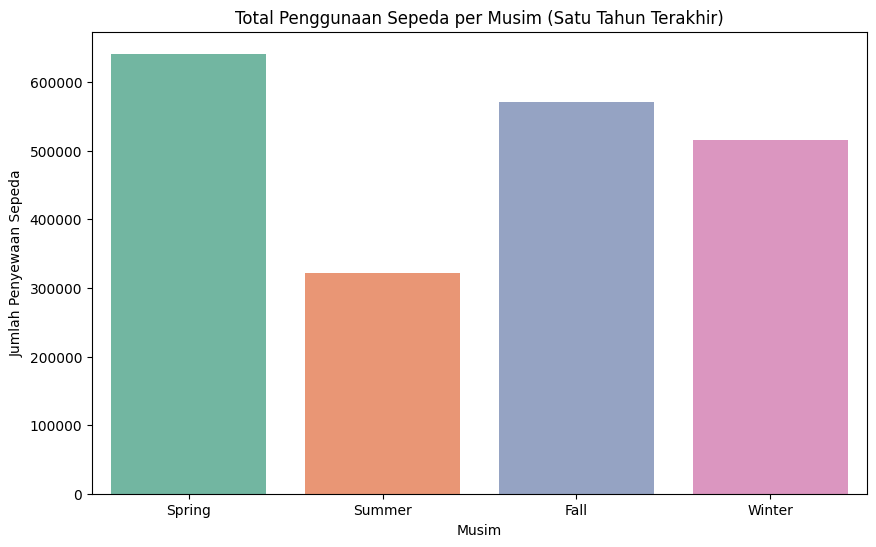

In [104]:
last_year_df = day_df[day_df['dteday'] >= '2012-01-01']

seasonal_usage = last_year_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_usage, palette='Set2')
plt.title('Total Penggunaan Sepeda per Musim (Satu Tahun Terakhir)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2: Apakah jam sibuk terjadi pada pagi dan sore hari saat jam kerja atau di akhir pekan saat pagi hari?

<Figure size 1200x600 with 0 Axes>

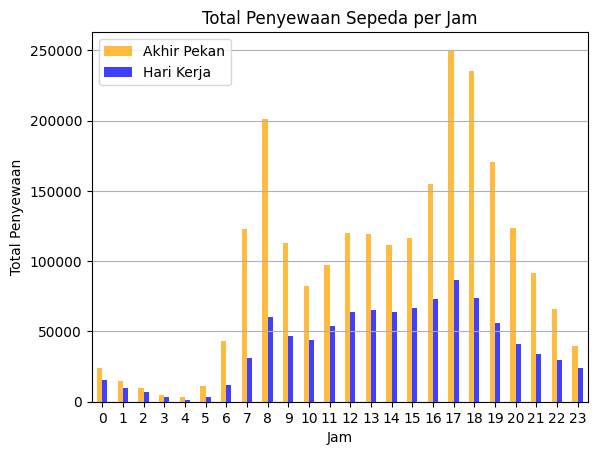

In [128]:
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', color=['orange', 'blue'], alpha=0.75)
plt.title('Total Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.legend(['Akhir Pekan', 'Hari Kerja'])
plt.grid(axis='y')
plt.show()

**Insight**:
- Kita menggunakan histogram untuk memvisualisasikan penggunaan sepeda tiap musinmnya dalam satu tahun terakhir
- Selanjutnya menggunakan histogram untuk memvisualisasikan trafik penggunaan sepeda tiap jamnya pada hari kerja dan hari libur

## Conclusion

### Conclution pertanyaan 1
Seperti yang terlihat pada grafik bahwa tren penggunaan sepeda paling banyak pada tahun 2012 adalah pada saat musim semi(spring), sedangkan yang peling rendah adalah pada saat musim panas(summer)

### Conclution pertanyaan 2
Terlihat pada grafik menunjukkan bahwa jam sibuk penggunaan sepeda terjadi di sore hari pada pukul 16-15 dan juga pada pagi hari pukul 7-9, baik ketika hari kerja maupun hari libur

In [130]:
hour_df.to_csv("hour_dataset.csv", index=False)
day_df.to_csv("day_dataset.csv", index=False)